# **HEALTH CARE EXPLORATORY DATA ANALYSIS(EDA)**

Data is essential to understanding patient demographics, medical conditions, and the efficacy of healthcare services in the crucial field of healthcare. We will examine a simulated healthcare dataset that closely resembles actual data in this EDA project.
This dataset is comprehensive for analysis because it includes a wide range of patient information, admission details, medical problems, and healthcare services. This project's main objective is to investigate, purify, and visualize the data in order to learn more about healthcare trends and the distribution of medical disorders.

**IMPORT NECESSARY LIBRARIES**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

**LOADING THE DATASET**

In [2]:
#read_csv functions helps to load the csv file data and create a dataframe in pandas
healthcare = pd.read_csv('/content/healthcare_dataset_new.csv')
#the below code displays the dataframe transpose for the 1st five rows
healthcare.head().T

,0,1,2,3,4
Name,Bobby JacksOn,LesLie TErRy,DaNnY sMitH,andrEw waTtS,adrIENNE bEll
Age,30,62,76,28,43
Gender,Male,Male,Female,Female,Female
Blood Type,B-,A+,A-,O+,AB+
Medical Condition,Cancer,Obesity,Obesity,Diabetes,Cancer
Date of Admission,2024-01-31,2019-08-20,2022-09-22,2020-11-18,2022-09-19
Doctor,Matthew Smith,Samantha Davies,Tiffany Mitchell,Kevin Wells,Kathleen Hanna
Hospital,Sons and Miller,Kim Inc,Cook PLC,"Hernandez Rogers and Vang,",White-White
Insurance Provider,Blue Cross,Medicare,Aetna,Medicare,Aetna
Billing Amount,18856.281306,33643.327287,27955.096079,37909.78241,14238.317814


**DATASET BRIEF OVERVIEW**

In [3]:
#summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                20781 non-null  object 
 1   Age                 20781 non-null  int64  
 2   Gender              20781 non-null  object 
 3   Blood Type          20781 non-null  object 
 4   Medical Condition   20781 non-null  object 
 5   Date of Admission   20781 non-null  object 
 6   Doctor              20781 non-null  object 
 7   Hospital            20781 non-null  object 
 8   Insurance Provider  20781 non-null  object 
 9   Billing Amount      20781 non-null  float64
 10  Room Number         20781 non-null  int64  
 11  Admission Type      20780 non-null  object 
 12  Discharge Date      20780 non-null  object 
 13  Medication          20780 non-null  object 
 14  Test Results        20780 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 2.4

In [4]:
#computes summary of statistics pertaining to the DataFrame's numeric columns.
healthcare.describe()

,Age,Billing Amount,Room Number
count,20781.000000,20781.000000,20781.000000
mean,51.641403,25630.861901,300.089986
std,19.603227,14190.045183,115.154298
min,18.000000,-1310.272895,1.000000
25%,35.000000,13310.818991,201.000000
50%,52.000000,25694.504014,301.000000
75%,69.000000,37777.425336,398.000000
max,85.000000,52271.663747,500.000000


We can understand from the above table that age range of patients is between 18 to 85. The min billing amount is 1000 and maximum billing amount is 49995.

In [5]:
#computes summary of statistics pertaining to the DataFrame's categorical columns.
healthcare.describe(include = 'O')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,20781,20781,20781,20781,20781,20781,20781,20781,20780,20780,20780,20780
unique,20781,2,8,6,1827,18614,18040,5,3,1853,5,3
top,Bobby JacksOn,Female,O+,Hypertension,2022-06-29,Matthew Smith,Johnson PLC,Cigna,Elective,2020-12-12,Penicillin,Abnormal
freq,1,10417,2650,3524,23,9,21,4252,7072,23,4266,6972


In [6]:
# return a tuple with the dimension of the dataframe
healthcare.shape

(20781, 15)

There are 10000 rows and 15 columns in this dataset.

**DATA CLEANING**

In [7]:
#check for NULL values if any in each column
healthcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        1
Discharge Date        1
Medication            1
Test Results          1
dtype: int64

There are no null values in our healthcare dataset as the value for all the columns are zero.

In [8]:
#check if there are duplicate records in the data
healthcare.duplicated().sum()

0

As the result is zero it means there are no duplicate records

In [9]:
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [10]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
for date in ['Date of Admission','Discharge Date']:
    healthcare[date] = pd.to_datetime(healthcare[date])
#calculate the no: of days patients got admitted in hospital
healthcare['Days Hospitalized'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days
healthcare['Days Hospitalized'] = healthcare['Days Hospitalized'].astype(int)
healthcare['Days Hospitalized']

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [11]:
#drop columns irrelevant to our analysis
healthcare = healthcare.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number'])
healthcare.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

**DATA EXPLORATION AND VISUALIZATION**

In [12]:
#using for loop to find the distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('--')

Gender
Female    10417
Male      10364
Name: count, dtype: int64
--
Blood Type
O+     2650
AB+    2638
A+     2625
B+     2598
A-     2577
AB-    2573
O-     2563
B-     2557
Name: count, dtype: int64
--
Medical Condition
Hypertension    3524
Arthritis       3522
Asthma          3462
Diabetes        3436
Cancer          3429
Obesity         3408
Name: count, dtype: int64
--
Insurance Provider
Cigna               4252
Blue Cross          4160
UnitedHealthcare    4157
Medicare            4107
Aetna               4105
Name: count, dtype: int64
--
Admission Type
Elective     7072
Urgent       6977
Emergency    6731
Name: count, dtype: int64
--
Medication
Penicillin     4266
Lipitor        4226
Ibuprofen      4161
Paracetamol    4092
Aspirin        4035
Name: count, dtype: int64
--
Test Results
Abnormal        6972
Normal          6917
Inconclusive    6891
Name: count, dtype: int64
--


____________________________________________________________________________________________________


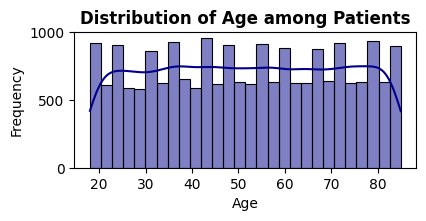

____________________________________________________________________________________________________


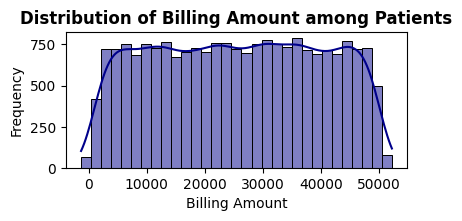

____________________________________________________________________________________________________


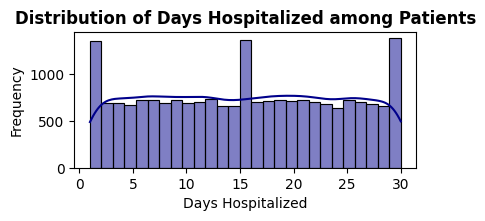

In [13]:
#plotting histograms to find the frequency of numeric columns (age, billing amount and days hospitalized)
for col in healthcare.columns:
    if healthcare[col].dtype == 'int' or healthcare[col].dtype == 'float':
        plt.figure(figsize = (15,6))
        plt.style.use('seaborn-v0_8-dark-palette')
        plt.subplot(3,3,3)
        sns.histplot(healthcare[col],kde = True,color = 'darkblue')
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        print("_"*100)
        plt.show()

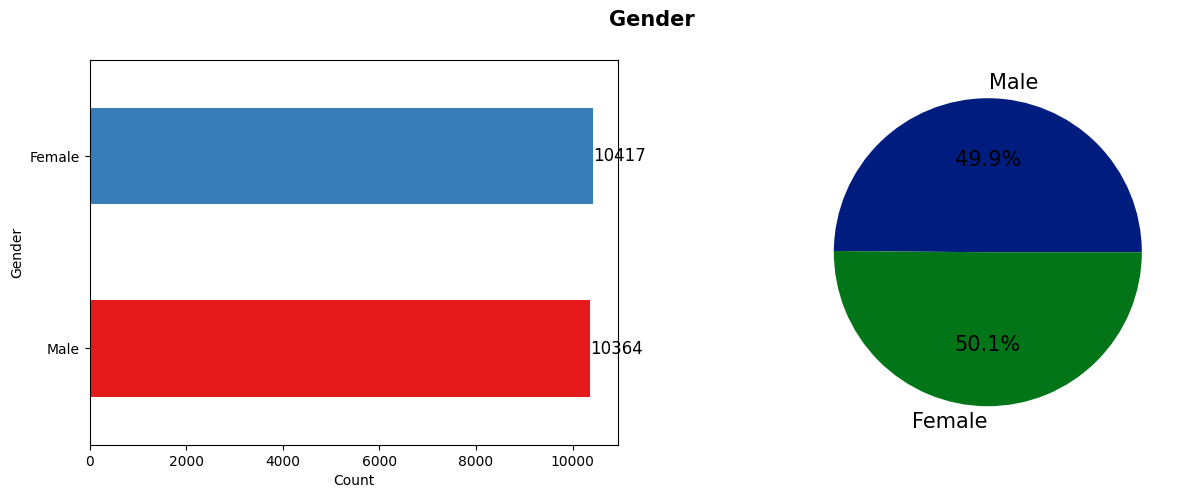

____________________________________________________________________________________________________




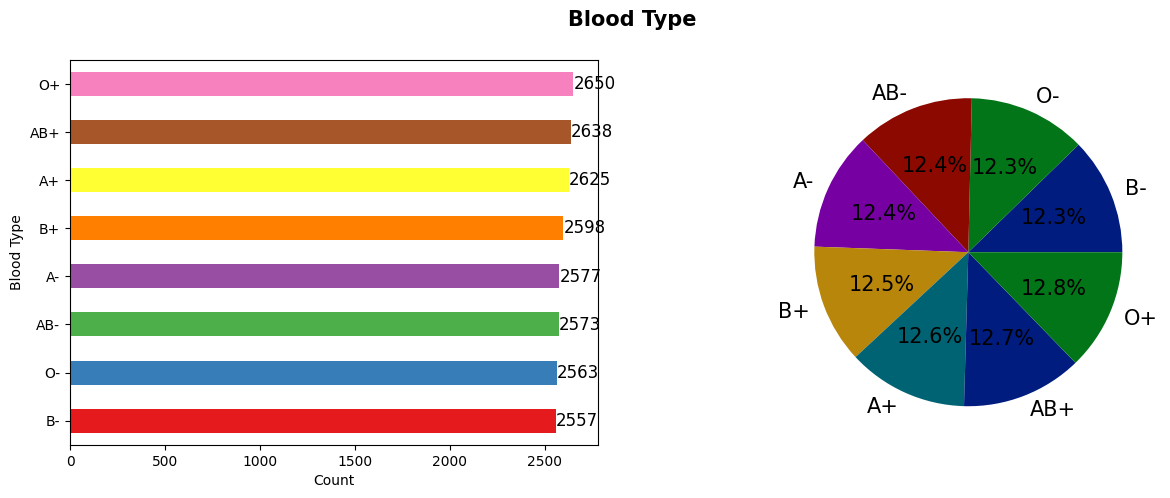

____________________________________________________________________________________________________




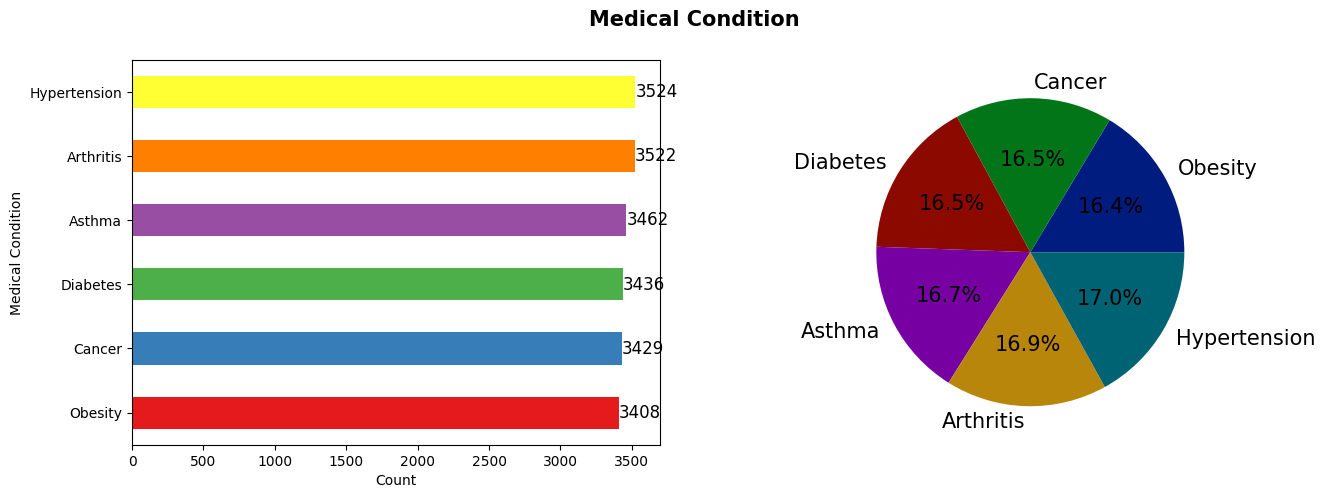

____________________________________________________________________________________________________




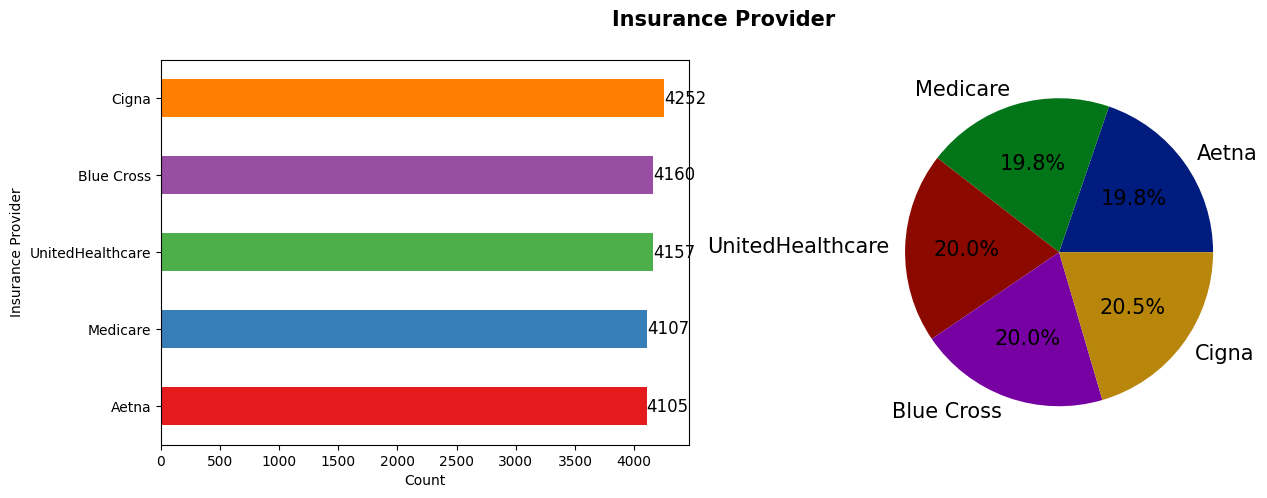

____________________________________________________________________________________________________




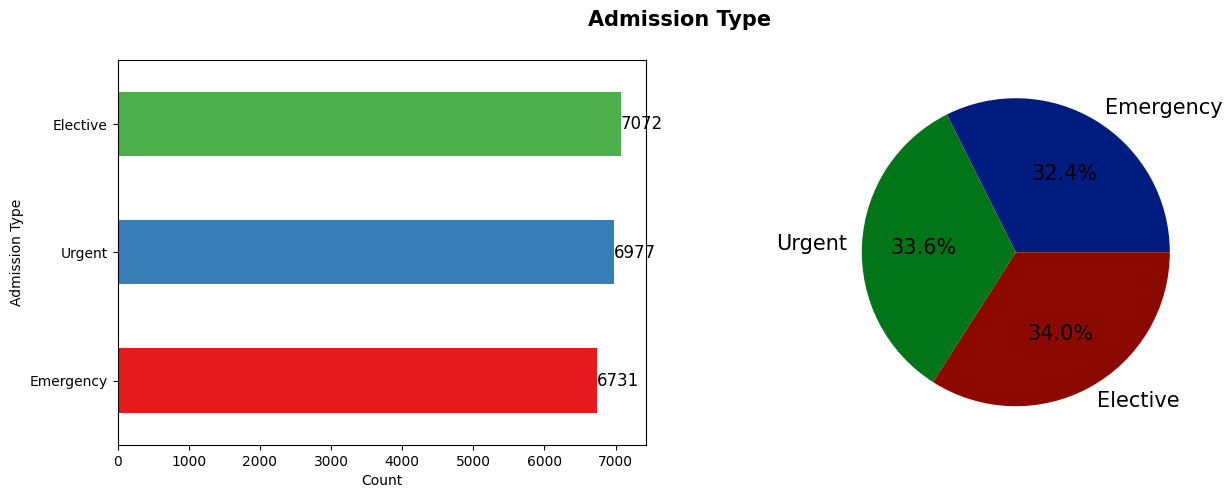

____________________________________________________________________________________________________




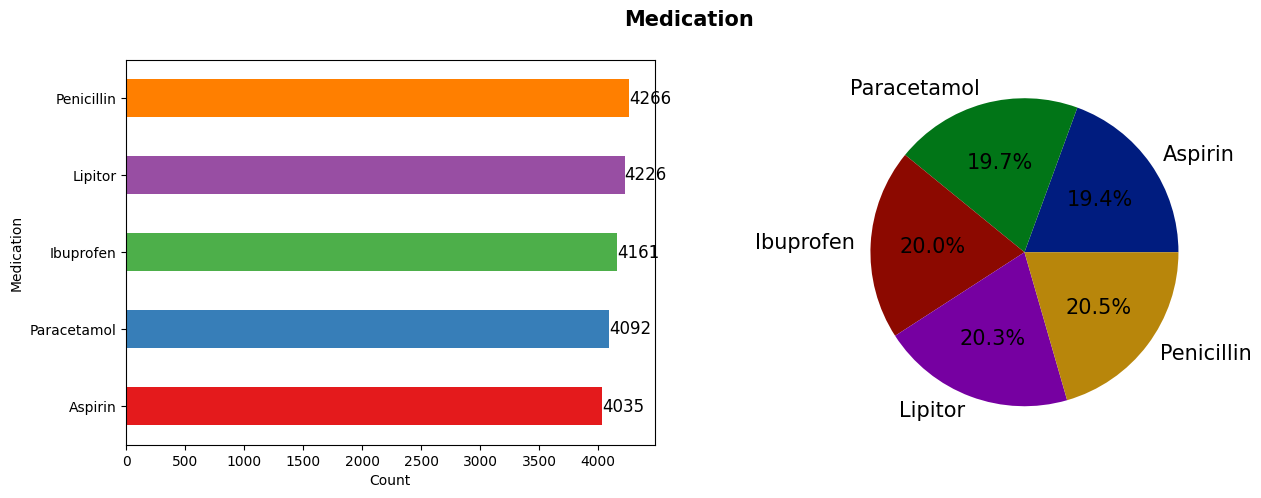

____________________________________________________________________________________________________




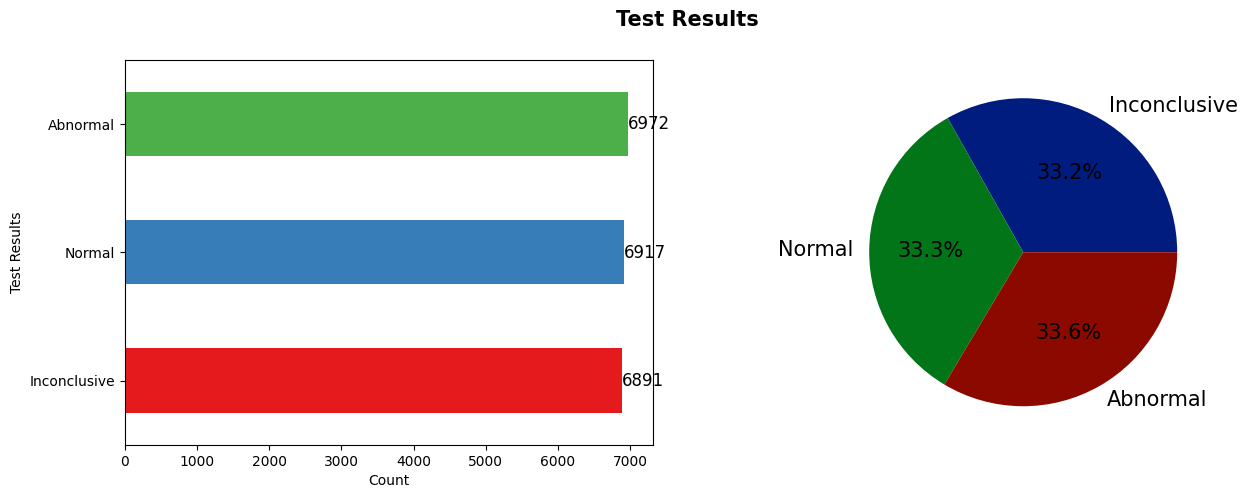

____________________________________________________________________________________________________


In [14]:
#plotting pie chart and bar chart to find the data distribution for categorical columns
#using for loop for visualization of data in categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (15,5))
        fig.suptitle(col,fontsize = 15,weight = 'bold')
        plt.subplot(1,2,1)
        category_count = healthcare[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.Set1.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 12,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',
               labels = category_count.index,
               autopct = '%1.1f%%',
               textprops = {'fontsize':15})
        plt.ylabel('')
        plt.show()
        print("_"*100)

**What is the distribution of medical condtions between genders?**

In [15]:
#unstack function converts the data into 2 dimensional
gender_medical = healthcare.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,1822,1700
Asthma,1699,1763
Cancer,1723,1706
Diabetes,1720,1716
Hypertension,1780,1744
Obesity,1673,1735


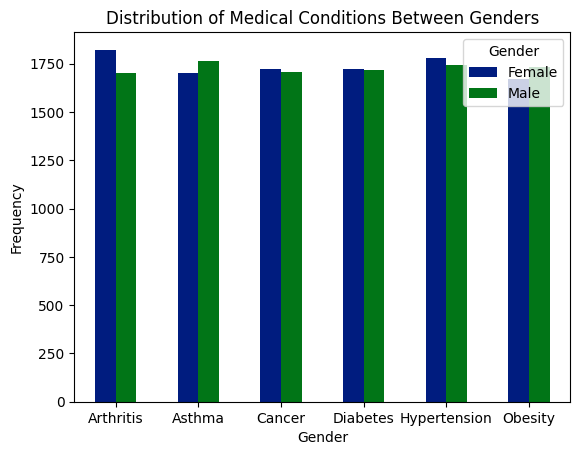

In [16]:
gender_medical.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

***Interpretation***

Female have higher share in majority of the medical conditions. Cancer is leading medical condition among female whereas Hypertension is leading cause among male.

**What is the correlation between age,billing amount and days hospitalized**

In [17]:
# selecting the columns to correlate
correlation_columns = ['Age','Billing Amount','Days Hospitalized']
# creating a df using the above columns
correlate_df = healthcare[correlation_columns]
#encoding categorical columns for correlation
correlate_df['Gender'] = healthcare['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = healthcare['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = healthcare['Test Results'].astype('category').cat.codes
# creating correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix

,Age,Billing Amount,Days Hospitalized,Gender,Admission Type,Test Results
Age,1.000000,-0.000597,0.004139,-0.006675,-0.006534,-0.010209
Billing Amount,-0.000597,1.000000,-0.001156,0.005261,-0.003022,-0.006071
Days Hospitalized,0.004139,-0.001156,1.000000,-0.000961,-0.006267,0.007589
Gender,-0.006675,0.005261,-0.000961,1.000000,0.005428,-0.006306
Admission Type,-0.006534,-0.003022,-0.006267,0.005428,1.000000,0.006708
Test Results,-0.010209,-0.006071,0.007589,-0.006306,0.006708,1.000000


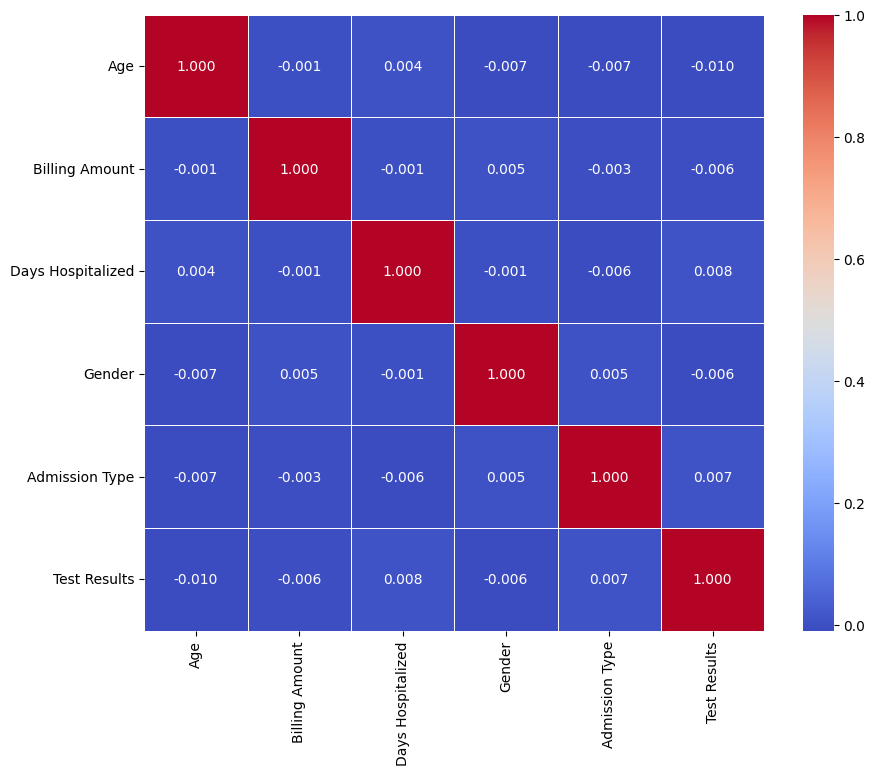

In [18]:
#plotting correlation matrix using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

***Interpretation***

* There is a slight correlation between age and test results. Even there is a positive correlation between age and days hospitalized. There is a negative correlation between age and billing amount.
* Biling amount has negative correlation with test results and days hospitalized. Billing amount has a positive correlation with admission type and gender.
* Days hospitalized has negative correlation with every attribute except age.
* Except for billing amount attribute, gender has a negative correlation with all other attributes.
* Admission type and test results have a negative correlation.

**What is the total billing amount for top 10 hospitals?**

In [19]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = healthcare.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Johnson PLC,655584.162985
1,Smith PLC,412330.808816
2,Ltd Smith,403511.977113
3,Williams LLC,386224.747748
4,Johnson LLC,361924.249876
5,Inc Brown,360401.303211
6,LLC Johnson,346765.583543
7,Johnson Inc,342222.502485
8,Smith Group,319821.628897
9,Miller PLC,316315.327335


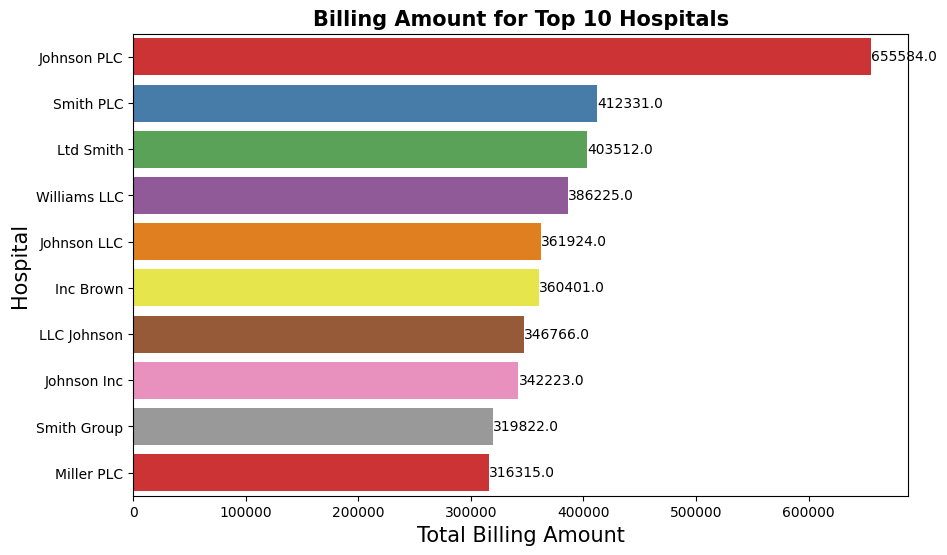

In [20]:
# plot bar graph to find the top 10 hospitals by billing
plt.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()

***INTERPRETATION***

Smith and Sons has the highest average billing amount of 477639.

**Who are the top 20 doctors by billing amount?**

In [21]:
# Grouping data by doctors and calculating the sum of billing amount
top20_doctors_billing = healthcare.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:20].reset_index()
top20_doctors_billing

,Doctor,Billing Amount
0,John Smith,244077.479148
1,Matthew Smith,242928.542559
2,James Smith,236493.724556
3,Robert Smith,215530.232148
4,Robert Miller,200904.880889
5,Michael Smith,195451.383290
6,Michael Johnson,180306.970773
7,Jessica Brown,177277.787096
8,Daniel Smith,170649.948305
9,James Johnson,169126.291076


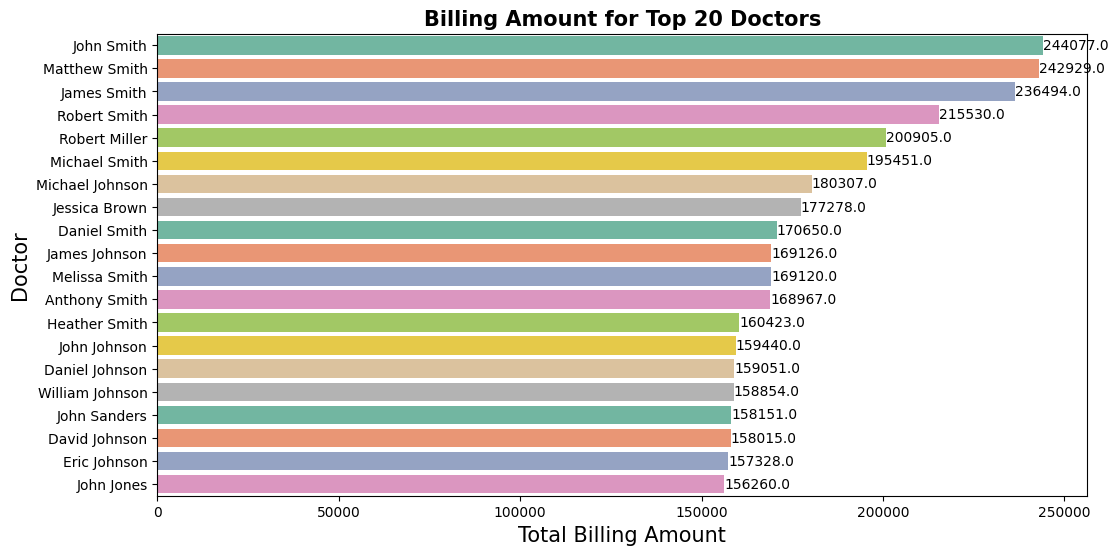

In [22]:
# plot bar graph to find the top 20 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= top20_doctors_billing['Billing Amount'],
            y= top20_doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(top20_doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 20 Doctors',fontsize = 15, weight = 'bold')
plt.show()

***Interpretation***


Doctor Michael Johnson is the top doctor with a total billing amount of 181576.

**Which medical condition generated the highest average billing among male and female?**

In [23]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = healthcare.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,25288.589421
1,Arthritis,Male,25711.792984
2,Asthma,Female,25833.021902
3,Asthma,Male,26105.547597
4,Cancer,Female,25222.830887
5,Cancer,Male,25050.949739
6,Diabetes,Female,25918.183059
7,Diabetes,Male,25617.573769
8,Hypertension,Female,25502.345548
9,Hypertension,Male,25569.997946


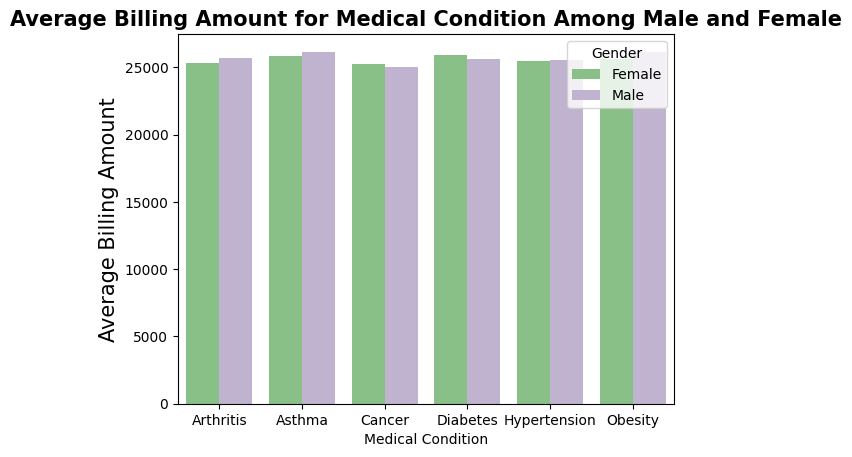

In [24]:
# plot bar graph to find the average billing amount for medical condition among male and female
sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'],ci = None,
            palette="Accent")
# Adding labels and title
plt.ylabel('Average Billing Amount',fontsize = 15)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 15, weight = 'bold')
plt.show()

**What is the distribution of different age groups?**

In [25]:
min_age = healthcare['Age'].min()
max_age = healthcare['Age'].max()
print(min_age,",",max_age)

18 , 85


In [26]:
healthcare['Age_Group'] = pd.cut(healthcare['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = healthcare['Age_Group'].value_counts().sort_values(ascending = False)
Age_group

Age_Group
18-30      3602
51-60      3103
71-80      3070
31-40      3064
41-50      3057
61-70      3010
Over 80    1875
Name: count, dtype: int64

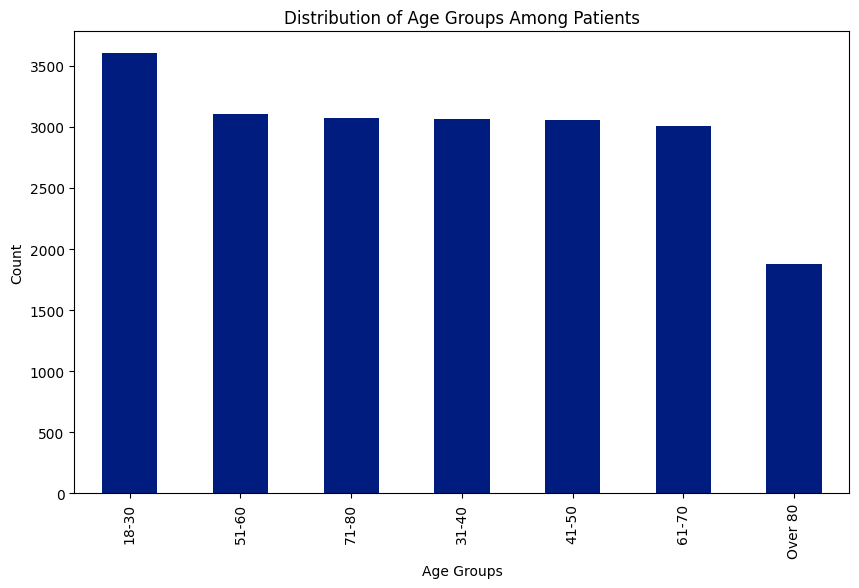

In [27]:
plt.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

***Interpretation***

The maximum number of patients are in the range of 18-30.

**CONCLUSION**

- Compared to male, there are high female patients.
- Most patients have the blood type of **AB-**.
- Asthma is the major medical condition among patients.
- Cigna is the leading insurance provider.
- Pencilin is the most prescribed medication.